- 모델링에 가장 적합한 확률분포 : 정규분포
    - 수집된 data는 특정방향으로 치우쳐져 있음
- 한쪽으로 치우친 변수에 대해서는 반대방향의 값(꼬리부분)들이 이상치처럼 작용할 수 있으므로, 이러한 치우침을 제거해야 함

### 탐색 방법 : 왜도(skewness)
- 변수 치우침 확인하는 가장 적절한 척도
- 왜도 : 분포의 비대칭도를 나타내는 통계량
    - df.skew()
    - np.skew(array)
    - 보통 왜도의 절대값이 1.5이상이면 치우쳤다고 판단
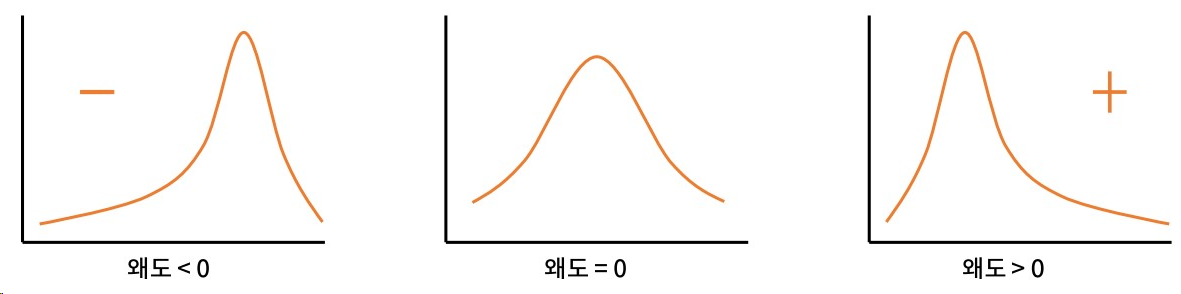
- log 변환을 통해 비대칭도를 제거

In [1]:
import pandas as pd

In [27]:
df = pd.read_csv("./데이터/sonar.csv", header = None) # 컬럼명이 없을 때 header = None

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [29]:
df.shape

(208, 61)

In [30]:
columns = ['band' + str(i) for i in range(1,61)]
columns.append('y')
df.columns = columns
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band52,band53,band54,band55,band56,band57,band58,band59,band60,y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [32]:
X = df.drop('y', axis = 1)
y = df['y']

In [33]:
X.skew()
# band4의 왜도가 가장 큼 : 모양 확인

band1     2.131088
band2     2.155644
band3     2.652518
band4     3.401697
band5     2.018141
band6     1.248166
band7     0.970820
band8     1.481107
band9     1.633870
band10    1.281258
band11    0.987813
band12    0.588681
band13    0.736584
band14    1.022369
band15    0.763964
band16    0.694671
band17    0.654480
band18    0.525845
band19    0.283182
band20   -0.085331
band21   -0.252741
band22   -0.392289
band23   -0.594350
band24   -0.691861
band25   -0.788909
band26   -0.671580
band27   -0.627843
band28   -0.615447
band29   -0.442007
band30   -0.132390
band31    0.259797
band32    0.313420
band33    0.423864
band34    0.563296
band35    0.591654
band36    0.619868
band37    0.676994
band38    1.033366
band39    0.908835
band40    0.861280
band41    0.863526
band42    0.860110
band43    0.909317
band44    1.235086
band45    1.366839
band46    1.706674
band47    1.790155
band48    1.277722
band49    1.273385
band50    1.761714
band51    2.716060
band52    2.093976
band53    1.

In [34]:
%matplotlib inline

<Axes: >

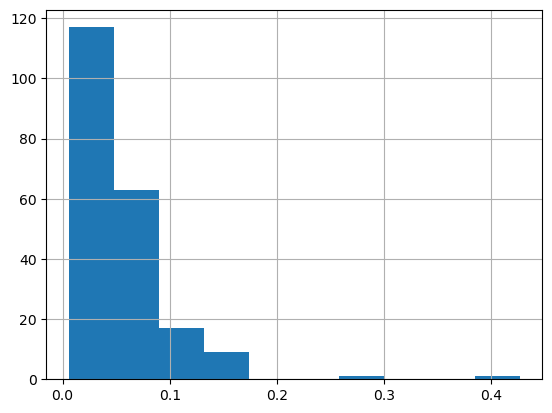

In [35]:
df['band4'].hist()

In [36]:
# 왜도기반 치우친 변수에 대해 치우침을 제거 후 사용
# log 변환을 진행해서 치우침 제거
import numpy as np
bias_var = X.columns[X.skew().abs() > 1.5] # log 변환 대상 컬럼명(왜도가 심한 컬럼명)

In [37]:
bias_var

Index(['band1', 'band2', 'band3', 'band4', 'band5', 'band9', 'band46',
       'band47', 'band50', 'band51', 'band52', 'band55', 'band56', 'band57',
       'band58', 'band59', 'band60'],
      dtype='object')

<Axes: >

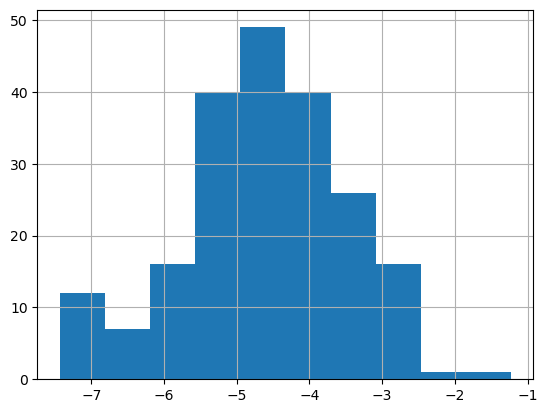

In [39]:
# 왜도가 가장 큰 bands에 대해 loh 변환 후 hist 확인
np.log2(df['band4']).hist()

In [40]:
X[bias_var] = np.log2(X[bias_var])

C:\Anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [41]:
X[bias_var].head()

,band1,band2,band3,band4,band5,band9,band46,band47,band50,band51,band52,band55,band56,band57,band58,band59,band60
0,-5.643856,-4.752437,-4.546245,-5.594225,-3.389867,-1.685477,-2.851001,-3.250165,-4.947862,-5.429731,-8.532825,-7.117787,-5.904008,-5.795859,-6.895395,-6.795859,-8.287712
1,-4.464345,-4.257045,-3.568324,-3.859352,-3.079478,-1.583376,-5.622376,-4.237864,-7.356975,-6.321928,-6.895395,-6.733124,-5.710284,-6.158429,-7.673003,-7.587273,-7.828281
2,-5.254289,-4.102837,-3.185737,-3.206895,-3.359934,-0.837017,-5.828281,-2.891108,-6.559792,-8.243318,-5.429731,-5.795859,-5.356975,-4.983932,-5.930160,-6.717857,-7.002310
3,-6.643856,-5.869860,-4.004624,-5.608232,-5.608232,-4.063711,-1.452451,-1.913216,-5.088040,-5.374823,-6.368849,-6.878321,-7.097888,-7.643856,-7.828281,-7.965784,-6.417348
4,-3.714065,-3.908334,-4.377819,-4.665661,-4.083141,-1.488431,-4.243318,-4.807932,-7.764150,-6.002310,-8.333516,-6.506353,-9.380822,-7.117787,-7.702750,-6.546245,-6.733124


In [44]:
# 치우친 변수명을 확인 : 치우친 변수에 대해서는 log변환 진행된 data이므로
# 왜도 절대값이 1.5 초과 컬럼은 없음
X.columns[X.skew().abs() > 1.5]

Index([], dtype='object')

- tip.
    - 모든 데이터가 log 변환 후 왜도값이 1.5 이하로 떨어지는 건 아님
    - 치우침을 제거 했을 때 알고리즘 성능이 절대적으로 좋아지는 건 아님
    - 데이터(특성) 중 돈과 관련된 특성은 log 변환이 데이터가 모델에 미치는 영향을 높인다고 알려져 있음